In [66]:
!pip install gymnasium numpy matplotlib

In [51]:
!pip install pygame

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 53.7 MB/s eta 0:00:00m eta 0:00:0136m0:00:01


In [152]:
import gymnasium
import numpy as np
from collections import defaultdict

import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

import random

In [198]:
env = gymnasium.make("Blackjack-v1")

In [23]:
env.observation_space.sample()

(22, 2, 1)

In [47]:
env.reset()

((17, 10, 1), {})

In [29]:
env.action_space.sample()

1

In [175]:
epoch_rewards = []

for i in range(100000):
    obs, info = env.reset()
    terminated = False
    epoch_reward = 0
    
    while not terminated:
        action = env.action_space.sample()
        obs, reward, terminated, _, _ = env.step(action)
        epoch_reward += reward

    epoch_rewards.append(epoch_reward)


In [176]:
sum(epoch_rewards) / len(epoch_rewards)

-0.39415

(-1.0, 1.0)

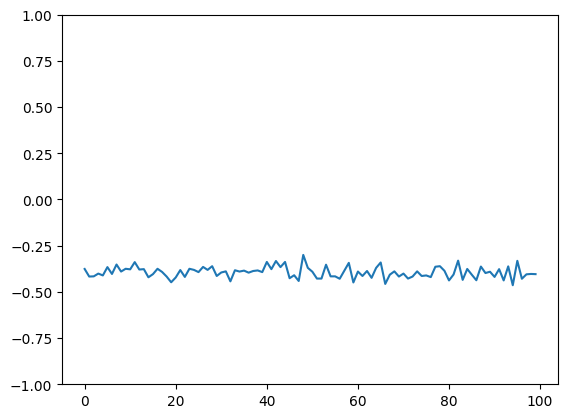

In [177]:
epoch_rewards = np.array(epoch_rewards)
epoch_rewards_splits = np.split(epoch_rewards, 100)

plt.plot(range(100), np.mean(epoch_rewards_splits, 1))
ax = plt.gca()
ax.set_ylim([-1, 1])

In [ ]:
# Q-Learning

In [196]:
q_values = defaultdict(lambda: [0, 0])
n = defaultdict(int)

epoch_rewards = []

# hyperparams
gamma = 0.94  # discount rate
alpha = lambda n: 20 / (19 + n)
epsilon = lambda n: 10 / (9 + n)

In [193]:
def get_action(obs):
    epsilon_threshold = random.uniform(0, 1)
    if epsilon_threshold > epsilon(n[obs]):
        action = max([0, 1], key=lambda l: q_values[obs][l])
    else:
        action = env.action_space.sample()
    return action

In [197]:


for i in range(1000000):
    
    obs, info = env.reset()
    terminated = False
    epoch_reward = 0
    
    while not terminated:
        n[obs] += 1
        
        action = get_action(obs)
        next_obs, reward, terminated, _, _ = env.step(action)
        epoch_reward += reward

        # Update the Q value
        # q_values[obs][action] = (1-alpha(n[obs])) * q_values[obs][action] + alpha(n[obs]) * (epoch_reward + gamma * max(q_values[obs]))

        q_values[obs][action] = (1-alpha(n[obs])) * q_values[obs][action] + alpha(n[obs]) * (epoch_reward + gamma * max(q_values[next_obs]))
        
        obs = next_obs

    epoch_rewards.append(epoch_reward)




(-1.0, 1.0)

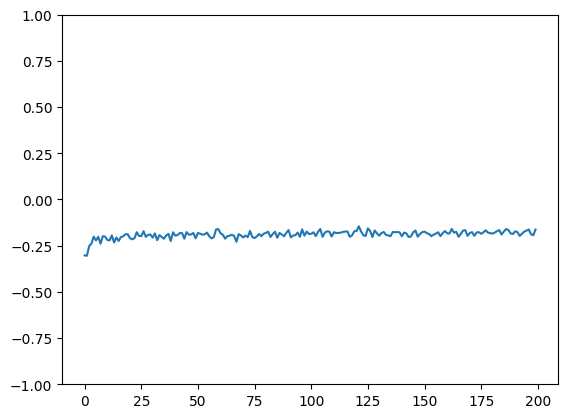

In [195]:
epoch_rewards = np.array(epoch_rewards)
split_size = 200
epoch_rewards_splits = np.split(epoch_rewards, split_size)

plt.plot(range(split_size), np.mean(epoch_rewards_splits, 1))
ax = plt.gca()
ax.set_ylim([-1, 1])